# Classifying Cats and Dogs Using Convolutional Neural Networks

## The aim of the project is to develop and train a convolutional neural network (CNN) model capable of accurately classifying images of cats and dogs based on their visual features.

### Importing Dependency

In [3]:
import os
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

## Loading Dataset
### Spliting data into Train and test 

## TRAIN DATA

In [30]:
trn_path=r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\training_set"
train_ds = keras.utils.image_dataset_from_directory(
    directory=trn_path,
    labels='inferred',
    label_mode='int',
    batch_size=100,
    image_size=(128, 128))

Found 8005 files belonging to 2 classes.


Class names :-  ['cats', 'dogs']


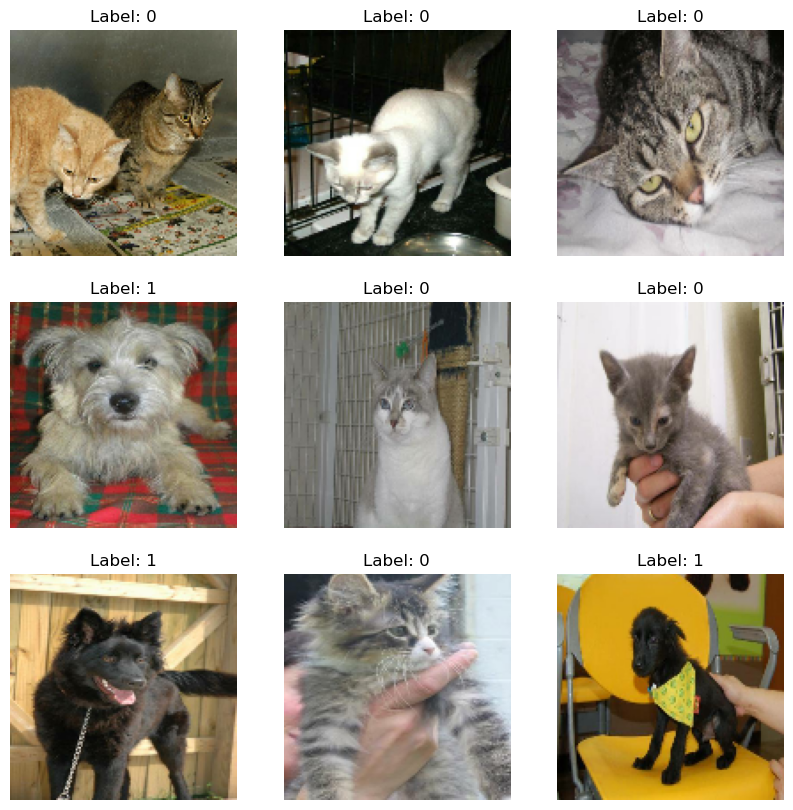

In [33]:
print("Class names :- ",train_ds.class_names)
for images, labels in train_ds:
    plt.figure(figsize=(10, 10))
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()
    break  


## TEST DATA

In [3]:
tst_path = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\test_set"
test_ds = keras.utils.image_dataset_from_directory(
    directory=tst_path,
    labels='inferred',
    label_mode='int',
    batch_size=100,
    image_size=(128, 128))


Found 2023 files belonging to 2 classes.


### Feature Scaling

In [4]:
def normalize(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

### Creating CNN Model Architecture

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [6]:
model = Sequential()

model.add(Conv2D(filters=128,kernel_size=(3,3),padding="valid",activation="relu",
                        input_shape=(128, 128, 3),name="conv_1"))
model.add(MaxPool2D(pool_size=(2,2),name="pool_1"))


model.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid",activation="relu",name="conv_2" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_2"))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="valid",activation="relu",name="conv_3" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_3"))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="valid",activation="relu",name="conv_4" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_4"))

model.add(Conv2D(filters=8,kernel_size=(3,3),padding="valid",activation="relu",name="conv_5" ))
model.add(MaxPool2D(pool_size=(2,2),name="pool_5"))

model.add(Flatten())

model.add(Dense(units=30,activation="relu",name="layer_1"))
model.add(Dense(units=2,activation="softmax",name="layer_3"))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 pool_1 (MaxPooling2D)       (None, 63, 63, 128)       0         
                                                                 
 conv_2 (Conv2D)             (None, 61, 61, 64)        73792     
                                                                 
 pool_2 (MaxPooling2D)       (None, 30, 30, 64)        0         
                                                                 
 conv_3 (Conv2D)             (None, 28, 28, 32)        18464     
                                                                 
 pool_3 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_4 (Conv2D)             (None, 12, 12, 16)        4

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

## Adding Callback to track the model training 

In [9]:
log_path = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\Log_tensorboard"
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_path)

## Training CNN Model

In [10]:
history = model.fit(train_ds, epochs=10,callbacks=[tensorboard_callback],validation_data= test_ds)

Epoch 1/10


81/81 [==============================] - 84s 1s/step - loss: 0.6884 - accuracy: 0.5534 - val_loss: 0.6619 - val_accuracy: 0.5961
Epoch 2/10
81/81 [==============================] - 82s 1s/step - loss: 0.6548 - accuracy: 0.6057 - val_loss: 0.6286 - val_accuracy: 0.6322
Epoch 3/10
81/81 [==============================] - 82s 1s/step - loss: 0.6207 - accuracy: 0.6448 - val_loss: 0.6480 - val_accuracy: 0.6214
Epoch 4/10
81/81 [==============================] - 82s 1s/step - loss: 0.6071 - accuracy: 0.6661 - val_loss: 0.5851 - val_accuracy: 0.7044
Epoch 5/10
81/81 [==============================] - 83s 1s/step - loss: 0.5663 - accuracy: 0.7009 - val_loss: 0.5503 - val_accuracy: 0.7242
Epoch 6/10
81/81 [==============================] - 83s 1s/step - loss: 0.5574 - accuracy: 0.7171 - val_loss: 0.6279 - val_accuracy: 0.6565
Epoch 7/10
81/81 [==============================] - 82s 1s/step - loss: 0.5350 - accuracy: 0.7309 - val_loss: 0.5683 - val_accuracy: 0.6925
Epoch 8/10
81/81 [

In [11]:
model.evaluate(test_ds)

21/21 [==============================] - 6s 288ms/step - loss: 0.6173 - accuracy: 0.7098


[0.6173182129859924, 0.7098369002342224]

## Ploting Model Training

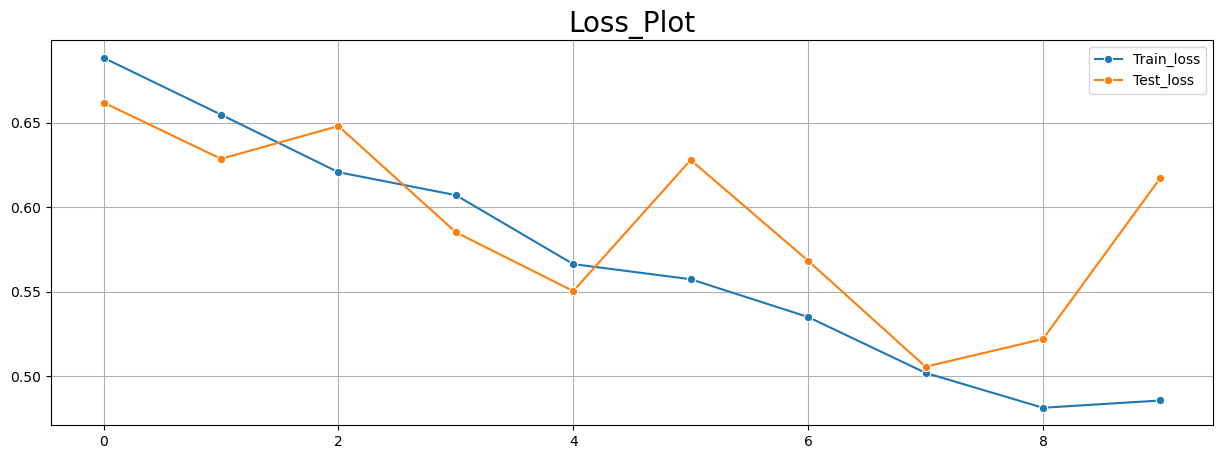

In [15]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(history.history["loss"],label="Train_loss",marker="o")
sns.lineplot(history.history["val_loss"],label="Test_loss",marker="o")
plt.title("Loss_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

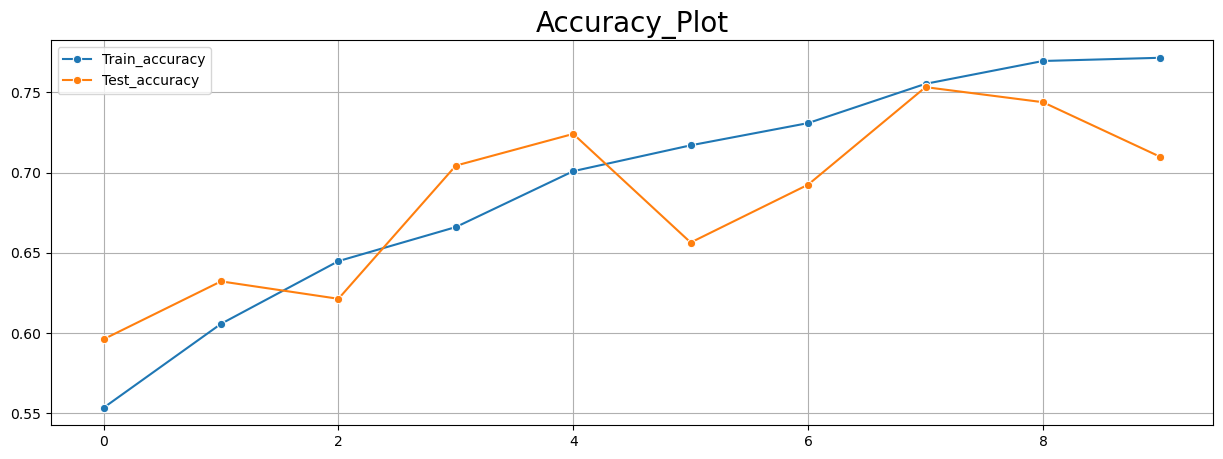

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(history.history["accuracy"],label="Train_accuracy",marker="o")
sns.lineplot(history.history["val_accuracy"],label="Test_accuracy",marker="o")
plt.title("Accuracy_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

## Model has OverFitted
## Model has high variance and high bias.
## Finding tradeoff
# Making Model Generalized
## - Increasing Data by Data Argumentation
## - Adding Batch Normalization Layers

## Training model on Argumented Data

In [17]:
arg_trn_path=r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\Arg_data\arg_training_data"
arg_train_ds = keras.utils.image_dataset_from_directory(
    directory=arg_trn_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128))

Found 17324 files belonging to 2 classes.


In [18]:
arg_train_ds = arg_train_ds.map(normalize)

## Creating New CNN Architecture with Batch Normalization Layers

In [19]:
from keras.layers import Dropout,BatchNormalization
model2 = Sequential()

model2.add(Conv2D(filters=128,kernel_size=(3,3),padding="valid",activation="relu",
                        input_shape=(128, 128, 3),name="conv_1"))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_1"))


model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="valid",activation="relu",name="conv_2" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_2"))

model2.add(Conv2D(filters=32,kernel_size=(3,3),padding="valid",activation="relu",name="conv_3" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_3"))

model2.add(Conv2D(filters=16,kernel_size=(3,3),padding="valid",activation="relu",name="conv_4" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_4"))

model2.add(Conv2D(filters=8,kernel_size=(3,3),padding="valid",activation="relu",name="conv_5" ))
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2),name="pool_5"))

model2.add(Flatten())

model2.add(Dense(units=30,activation="relu",name="layer_1"))
model2.add(Dense(units=2,activation="softmax",name="layer_3"))


In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 128)     512       
 Normalization)                                                  
                                                                 
 pool_1 (MaxPooling2D)       (None, 63, 63, 128)       0         
                                                                 
 conv_2 (Conv2D)             (None, 61, 61, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                                 
 pool_2 (MaxPooling2D)       (None, 30, 30, 64)       

In [21]:
model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [22]:
log_path = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\Log_tensorboard"
from keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_path)

## Training new Model

In [24]:
history2 = model2.fit(arg_train_ds, epochs=5,validation_data= test_ds)

Epoch 1/5
542/542 [==============================] - 225s 414ms/step - loss: 0.6009 - accuracy: 0.6791 - val_loss: 0.6552 - val_accuracy: 0.6105
Epoch 2/5
542/542 [==============================] - 226s 417ms/step - loss: 0.5549 - accuracy: 0.7175 - val_loss: 0.5145 - val_accuracy: 0.7395
Epoch 3/5
542/542 [==============================] - 229s 422ms/step - loss: 0.5148 - accuracy: 0.7421 - val_loss: 0.5214 - val_accuracy: 0.7474
Epoch 4/5
542/542 [==============================] - 232s 428ms/step - loss: 0.4754 - accuracy: 0.7727 - val_loss: 0.4445 - val_accuracy: 0.8038
Epoch 5/5
542/542 [==============================] - 227s 418ms/step - loss: 0.4372 - accuracy: 0.7957 - val_loss: 0.4253 - val_accuracy: 0.8062


In [25]:
model2.evaluate(test_ds)

21/21 [==============================] - 8s 338ms/step - loss: 0.4253 - accuracy: 0.8062


[0.42526891827583313, 0.8062283992767334]

## Ploting New Model Training

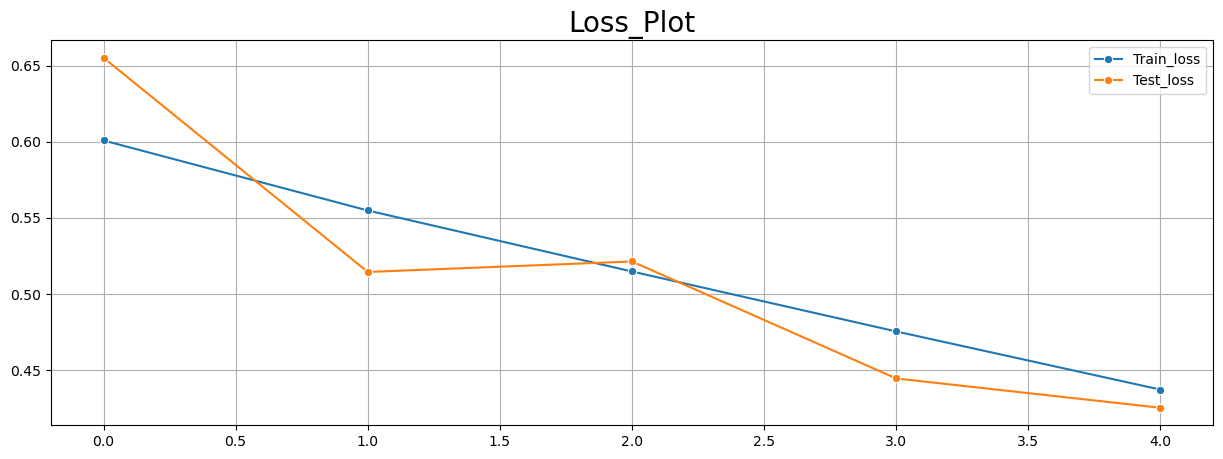

In [29]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(history2.history["loss"],label="Train_loss",marker="o")
sns.lineplot(history2.history["val_loss"],label="Test_loss",marker="o")
plt.title("Loss_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

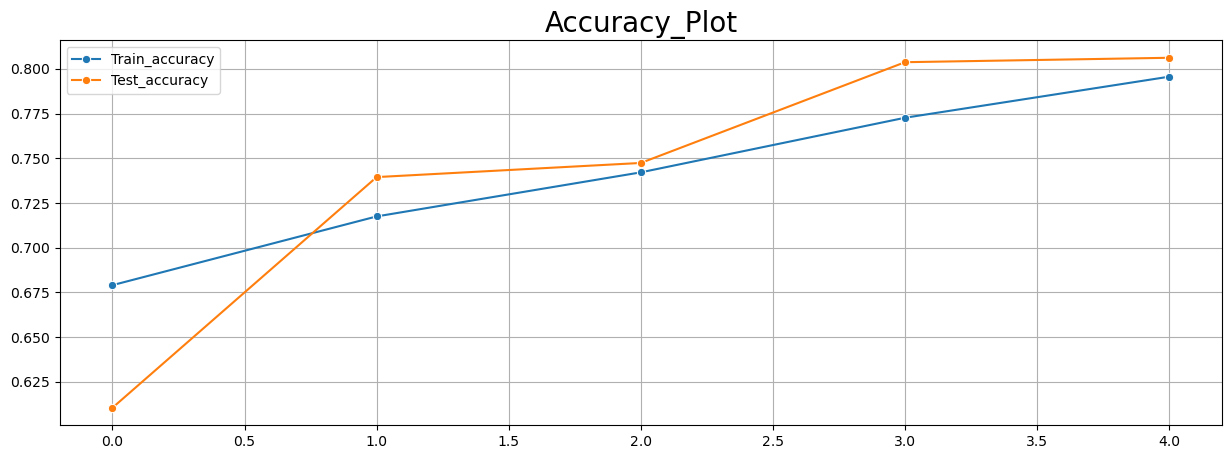

In [30]:
plt.figure(figsize=(15,5))
sns.lineplot(history2.history["accuracy"],label="Train_accuracy",marker="o")
sns.lineplot(history2.history["val_accuracy"],label="Test_accuracy",marker="o")
plt.title("Accuracy_Plot",fontsize=20)
plt.grid()
plt.legend()
plt.show()

# Model has Achived 80 % Accuracy and Model has not Over Fitted

# Testing Model

In [40]:
def Plot_image(path):
    img_path = os.path.join(path)   
    img = image.load_img(img_path, target_size=(299, 299)) 
    plt.imshow(img)
    plt.show()

In [49]:
def image_to_array(path):
    img_path = os.path.join(path)   
    img = image.load_img(img_path, target_size=(128, 128))  
    img_array = image.img_to_array(img)
    img_array_ = np.expand_dims(img_array, axis=0)
    img_array_prep = img_array_/255
    return img_array_prep

In [103]:
classes = ["Cat","Dog"]
def predict(path,model):
    img_array = image_to_array(path)
    predictions = model.predict(img_array)
    index = np.argmax(predictions)
    print("Final_Result :- ",classes[index])
    print("Probability  :- ",round(predictions[0][index],2), "%")

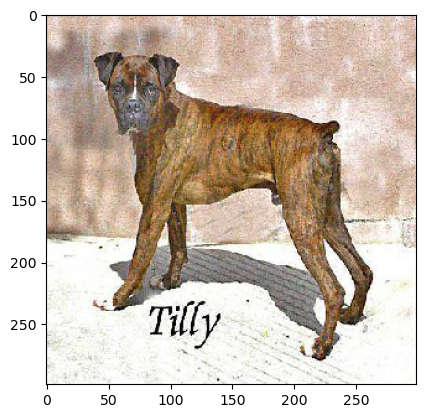

1/1 [==============================] - 0s 29ms/step
Final_Result :-  Dog
Probability  :-  0.97 %


In [106]:
img_path1 = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\training_set\dogs\dog.991.jpg"
Plot_image(img_path1)
predict(img_path1,model2)

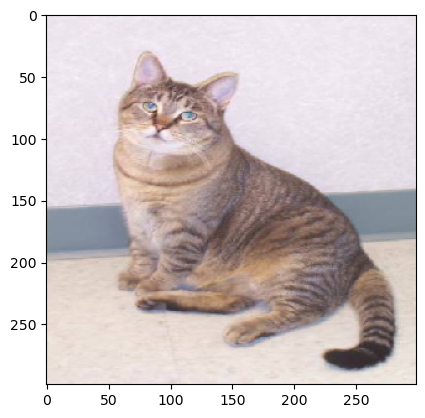

1/1 [==============================] - 0s 31ms/step
Final_Result :-  Cat
Probability  :-  0.98 %


In [107]:
img_path2 = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\training_set\cats\cat.998.jpg"
Plot_image(img_path2)
predict(img_path2,model2)

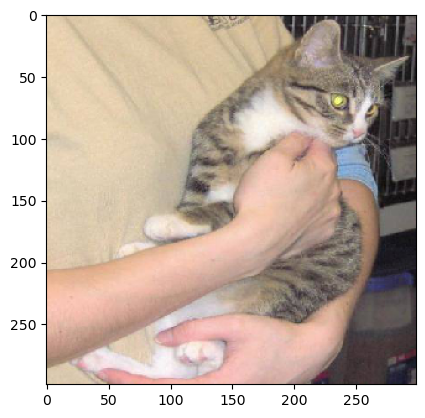

1/1 [==============================] - 0s 30ms/step
Final_Result :-  Cat
Probability  :-  0.88 %


In [111]:
img_path3 = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\training_set\cats\cat.765.jpg"
Plot_image(img_path3)
predict(img_path3,model2)

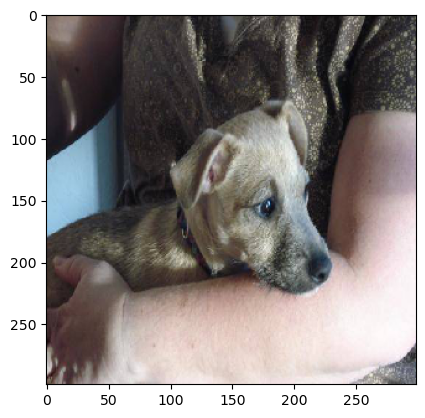

1/1 [==============================] - 0s 30ms/step
Final_Result :-  Dog
Probability  :-  0.55 %


In [112]:
img_path4 = r"C:\Users\abdul\Downloads\PROJECTS\Deep_Learning_Project\Cat & dog class CNN\training_set\dogs\dog.945.jpg"
Plot_image(img_path4)
predict(img_path4,model2)

# The End...